In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


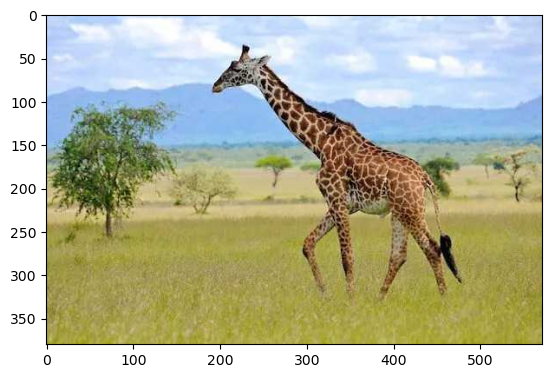

In [54]:
GIRAFFE = cv2.cvtColor(cv2.imread("./lectures/edge_detection/giraffe.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(GIRAFFE)

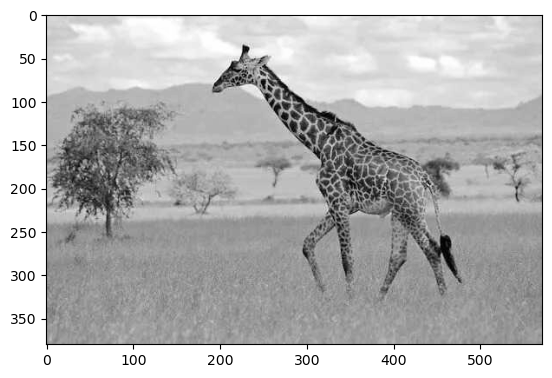

In [56]:
GIRAFFE_GRAYSCALE = cv2.cvtColor(GIRAFFE, cv2.COLOR_RGB2GRAY)
plt.imshow(GIRAFFE_GRAYSCALE, cmap="gray")

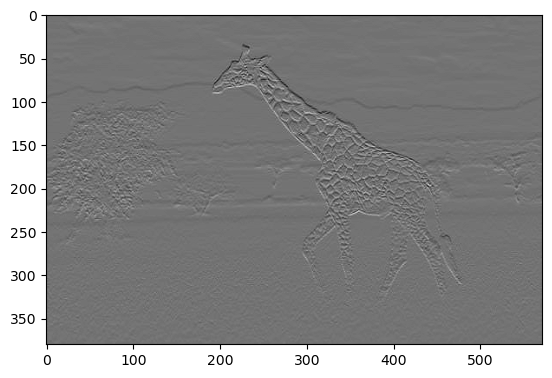

In [57]:
discrete_x_derivative = np.array([-1, 1])
GIRAFFE_X_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative)
plt.imshow(GIRAFFE_X_DERIVATIVE, cmap="gray")

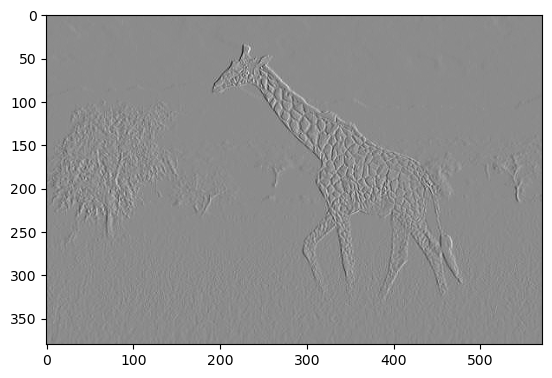

In [58]:
discrete_y_derivative = np.array([[-1, 1]])
GIRAFFE_Y_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative)
plt.imshow(GIRAFFE_Y_DERIVATIVE, cmap="gray")

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_2060\86235469.py:1: RuntimeWarning: invalid value encountered in sqrt
  DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))


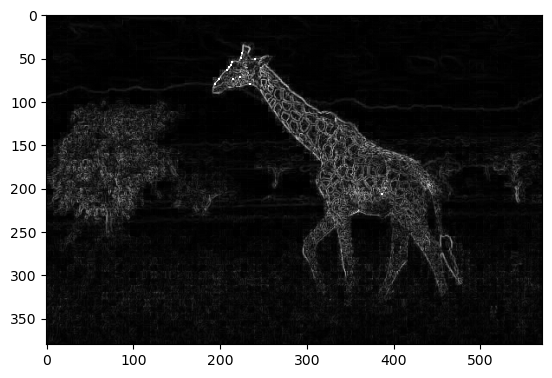

In [59]:
DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))
plt.imshow(DERRIVATIVE_STRENGHT, cmap="gray")

In [96]:
N = 3
O = 5
discrete_x_derivative_blurred = np.convolve(cv2.gausian(N-1, O).reshape(-1), discrete_x_derivative)
discrete_y_derivative_blurred = np.convolve(cv2.getGaussianKernel(N-1, O).reshape(-1), discrete_y_derivative.reshape(-1)).reshape(N, 1)

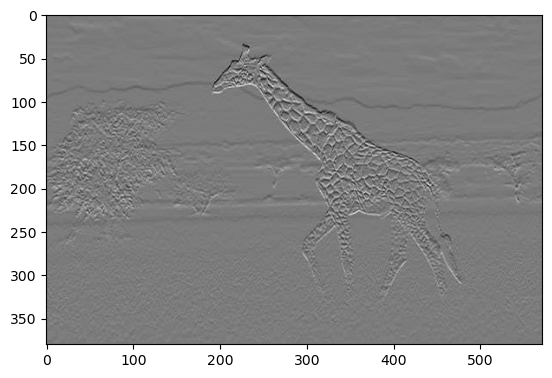

In [97]:
GIRAFFE_X_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative_blurred)
plt.imshow(GIRAFFE_X_DERIVATIVE_BLURRED, cmap="gray")

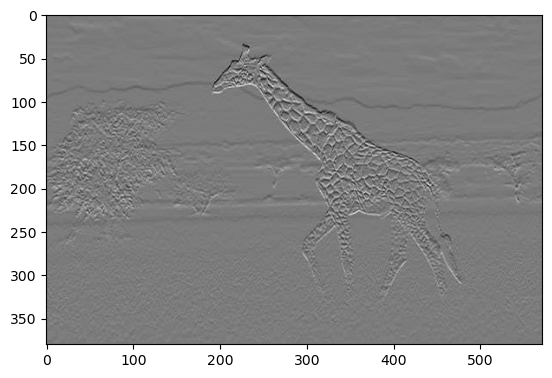

In [98]:
GIRAFFE_Y_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative_blurred)
plt.imshow(GIRAFFE_Y_DERIVATIVE_BLURRED, cmap="gray")

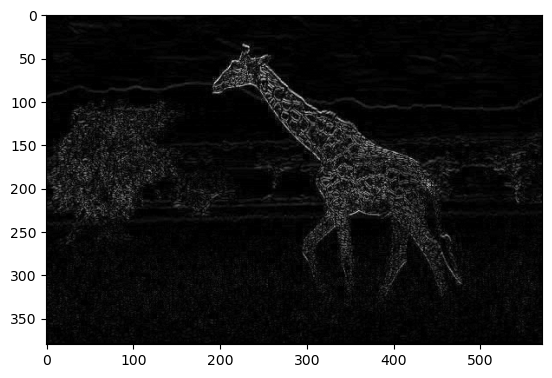

In [99]:
DERRIVATIVE_BLURRED_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE_BLURRED) + np.square(GIRAFFE_Y_DERIVATIVE_BLURRED))
plt.imshow(DERRIVATIVE_BLURRED_STRENGHT, cmap="gray")

In [86]:
sobel_x_derivative = np.array([ [-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1] ])
sobel_y_derivative = -np.transpose(sobel_x_derivative)

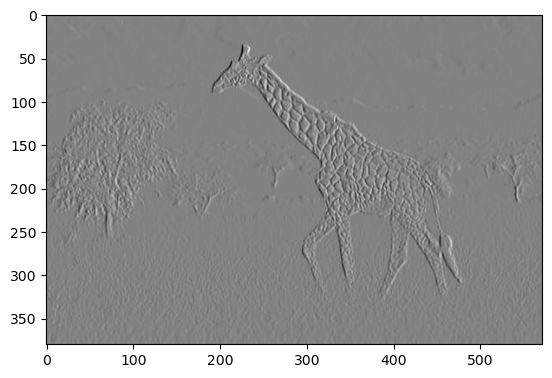

In [91]:
GIRAFFE_BY_SOBEL_X = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_x_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_X, cmap="gray")

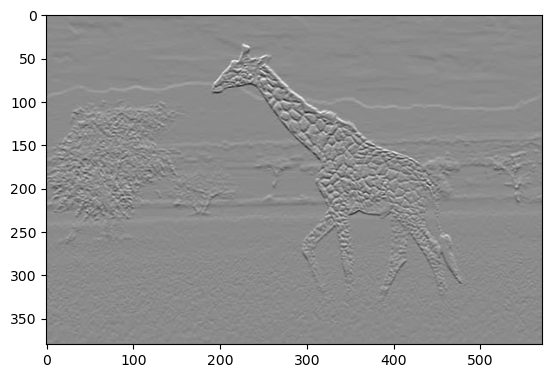

In [90]:
GIRAFFE_BY_SOBEL_Y = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_y_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_Y, cmap="gray")

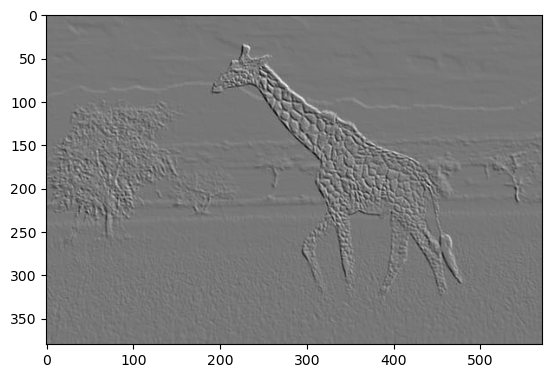

In [100]:
JOINED_SOBEL_GIRAFFE = (GIRAFFE_BY_SOBEL_X + GIRAFFE_BY_SOBEL_Y) / 2
plt.imshow(JOINED_SOBEL_GIRAFFE, cmap="gray")

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_2060\2350509736.py:1: RuntimeWarning: divide by zero encountered in true_divide
  SOBEL_AGNLES = np.arctan(np.nan_to_num(GIRAFFE_BY_SOBEL_Y / GIRAFFE_BY_SOBEL_X))
C:\Users\Aleksander\AppData\Local\Temp\ipykernel_2060\2350509736.py:1: RuntimeWarning: invalid value encountered in true_divide
  SOBEL_AGNLES = np.arctan(np.nan_to_num(GIRAFFE_BY_SOBEL_Y / GIRAFFE_BY_SOBEL_X))


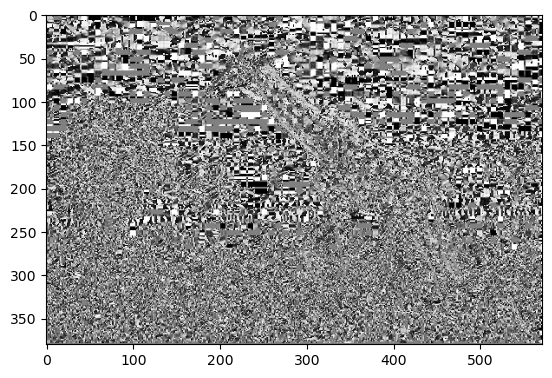

In [132]:
SOBEL_AGNLES = np.arctan(np.nan_to_num(GIRAFFE_BY_SOBEL_Y / GIRAFFE_BY_SOBEL_X))
plt.imshow(SOBEL_AGNLES, cmap="gray")

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_2060\2946763802.py:1: RuntimeWarning: invalid value encountered in sqrt
  SOBEL_MAGNITUDE = np.nan_to_num(np.sqrt(np.square(GIRAFFE_BY_SOBEL_X) + np.square(GIRAFFE_BY_SOBEL_Y)))


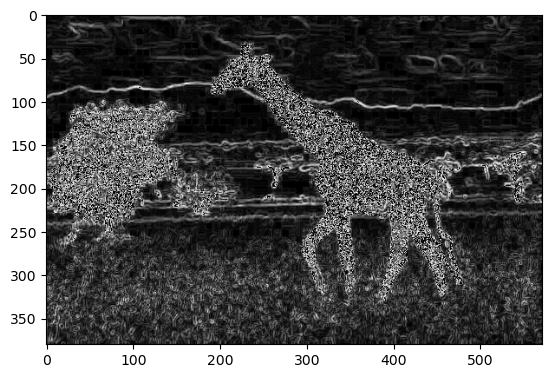

In [151]:
SOBEL_MAGNITUDE = np.nan_to_num(np.sqrt(np.square(GIRAFFE_BY_SOBEL_X) + np.square(GIRAFFE_BY_SOBEL_Y)))
plt.imshow(SOBEL_MAGNITUDE, cmap="gray")

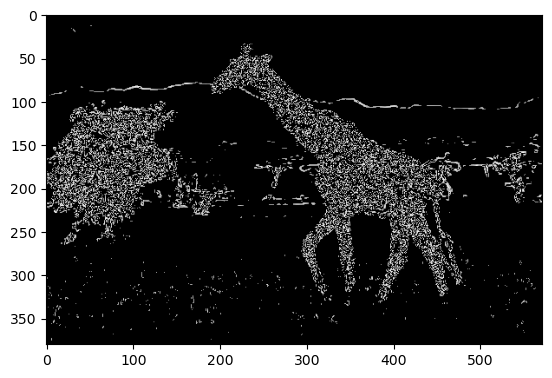

In [174]:
SOBEL_MAGNITUDE_THRESHOLDED = SOBEL_MAGNITUDE.copy()
SOBEL_MAGNITUDE_THRESHOLDED[SOBEL_MAGNITUDE_THRESHOLDED < 100] = 0
plt.imshow(SOBEL_MAGNITUDE_THRESHOLDED, cmap="gray")

In [175]:
LOCAL_MAXIMA = np.zeros_like(GIRAFFE_GRAYSCALE)
rows, columns = LOCAL_MAXIMA.shape
for i in range(rows):
    for j in range(columns):
        x_move = int(np.cos(SOBEL_AGNLES[i, j]) * SOBEL_MAGNITUDE_THRESHOLDED[i, j])
        y_move = int(np.sin(SOBEL_AGNLES[i, j]) * SOBEL_MAGNITUDE_THRESHOLDED[i, j])

        
        pointOne = SOBEL_MAGNITUDE_THRESHOLDED[(i + x_move) % rows, (j + y_move) % columns]
        currPoint = SOBEL_MAGNITUDE_THRESHOLDED[i, j]
        print
        pointTwo = SOBEL_MAGNITUDE_THRESHOLDED[(i - x_move) % rows, (j - y_move) % columns]
        if pointOne < currPoint > pointTwo:
            LOCAL_MAXIMA[i, j] = 1


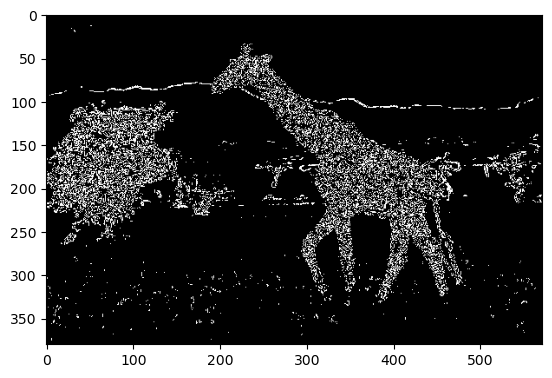

In [176]:
plt.imshow(LOCAL_MAXIMA, cmap="gray")